In [476]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy


In [477]:
nasa=pd.read_csv('NASA.csv')

In [478]:
nasa

,Year,DOY,Hour,"Scalar B, nT",SW Proton Density,SW Plasma Speed,Kp index,Sunspot,Dst-index,ap_index,f10.7_index,shifted_kp
0,2019.0,1.0,0.0,4.8,3.9,456.0,10.0,12.0,-3.0,4.0,69.5,0
1,2019.0,1.0,1.0,4.5,3.9,460.0,10.0,12.0,-5.0,4.0,69.5,10
2,2019.0,1.0,2.0,5.0,4.0,459.0,10.0,12.0,-4.0,4.0,69.5,10
3,2019.0,1.0,3.0,5.6,4.5,453.0,13.0,12.0,-2.0,5.0,69.5,10
4,2019.0,1.0,4.0,5.8,5.2,446.0,13.0,12.0,1.0,5.0,69.5,13
...,...,...,...,...,...,...,...,...,...,...,...,...
27020,2022.0,30.0,20.0,5.4,2.5,466.0,17.0,83.0,-11.0,6.0,125.8,17
27021,2022.0,30.0,21.0,5.4,2.5,463.0,30.0,83.0,-10.0,15.0,125.8,17
27022,2022.0,30.0,22.0,5.1,2.0,467.0,30.0,83.0,-13.0,15.0,125.8,30
27023,2022.0,30.0,23.0,4.9,1.7,469.0,30.0,83.0,-13.0,15.0,125.8,30


In [479]:
nasa=nasa.drop(['Year','Hour','Scalar B, nT','SW Proton Density','SW Plasma Speed','Dst-index','ap_index','shifted_kp '],axis=1)

In [480]:
nasa

,DOY,Kp index,Sunspot,f10.7_index
0,1.0,10.0,12.0,69.5
1,1.0,10.0,12.0,69.5
2,1.0,10.0,12.0,69.5
3,1.0,13.0,12.0,69.5
4,1.0,13.0,12.0,69.5
...,...,...,...,...
27020,30.0,17.0,83.0,125.8
27021,30.0,30.0,83.0,125.8
27022,30.0,30.0,83.0,125.8
27023,30.0,30.0,83.0,125.8


In [481]:
nasa = nasa[nasa['f10.7_index']< 999.9]


In [482]:
nasa

,DOY,Kp index,Sunspot,f10.7_index
0,1.0,10.0,12.0,69.5
1,1.0,10.0,12.0,69.5
2,1.0,10.0,12.0,69.5
3,1.0,13.0,12.0,69.5
4,1.0,13.0,12.0,69.5
...,...,...,...,...
27019,30.0,17.0,83.0,125.8
27020,30.0,17.0,83.0,125.8
27021,30.0,30.0,83.0,125.8
27022,30.0,30.0,83.0,125.8


In [483]:
nasa['Kp index ']=nasa['Kp index ']/10
#nasa['shifted_kp ']=nasa['shifted_kp ']/10

<ipython-input-483-9c65519593d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasa['Kp index ']=nasa['Kp index ']/10


In [484]:
nasa.columns

Index(['DOY', 'Kp index ', 'Sunspot', 'f10.7_index'], dtype='object')

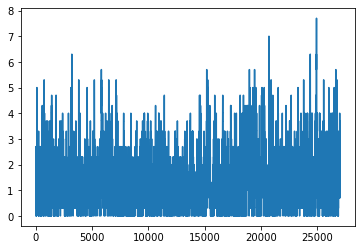

In [485]:
plt.plot(nasa["Kp index "])


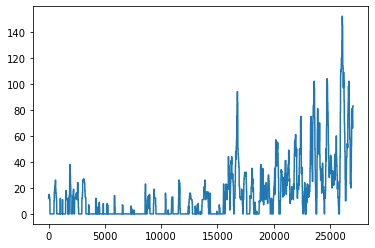

In [463]:
plt.plot(nasa["Sunspot"])

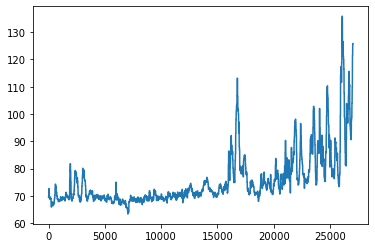

In [486]:
plt.plot(nasa["f10.7_index"])

In [465]:
nasa['Kp index ']

0        1.0
1        1.0
2        1.0
3        1.3
4        1.3
        ... 
27019    1.7
27020    1.7
27021    3.0
27022    3.0
27023    3.0
Name: Kp index , Length: 27000, dtype: float64

In [467]:
#nasa['shifted_kp '].value_counts()

In [385]:
#nasa['f10.7_index'].value_counts()

In [487]:
X = nasa.drop(columns = ['Kp index ','DOY'])
y = nasa['Kp index ']

In [488]:
X 

,Sunspot,f10.7_index
0,12.0,69.5
1,12.0,69.5
2,12.0,69.5
3,12.0,69.5
4,12.0,69.5
...,...,...
27019,83.0,125.8
27020,83.0,125.8
27021,83.0,125.8
27022,83.0,125.8


In [489]:
hafez = pd.concat([X,y], axis=1) 

In [490]:
xtrain = X[:21600]
ytrain = y[:21600]
xtest = X[21600:]
ytest = y[21600:]

In [491]:
hafez 

,Sunspot,f10.7_index,Kp index
0,12.0,69.5,1.0
1,12.0,69.5,1.0
2,12.0,69.5,1.0
3,12.0,69.5,1.3
4,12.0,69.5,1.3
...,...,...,...
27019,83.0,125.8,1.7
27020,83.0,125.8,1.7
27021,83.0,125.8,3.0
27022,83.0,125.8,3.0


In [447]:
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [492]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [493]:
dataset = nasa.values
dataset = nasa.astype('float32')

In [450]:
#X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

In [494]:
y

0        1.0
1        1.0
2        1.0
3        1.3
4        1.3
        ... 
27019    1.7
27020    1.7
27021    3.0
27022    3.0
27023    3.0
Name: Kp index , Length: 27000, dtype: float64

In [452]:
look_back = 1
trainX, trainY = create_dataset(xtrain.values, look_back=1)
testX, testY = create_dataset(xtest.values, look_back=1)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100)
# make predictions
#trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
675/675 [==============================] - 3s 3ms/step - loss: 56.4859 - accuracy: 0.5578
Epoch 2/100
675/675 [==============================] - 2s 3ms/step - loss: 12.2808 - accuracy: 0.5577
Epoch 3/100
675/675 [==============================] - 2s 3ms/step - loss: 7.0427 - accuracy: 0.5577
Epoch 4/100
675/675 [==============================] - 2s 3ms/step - loss: 4.6729 - accuracy: 0.5577
Epoch 5/100
675/675 [==============================] - 2s 3ms/step - loss: 3.4095 - accuracy: 0.5577
Epoch 6/100
675/675 [==============================] - 2s 3ms/step - loss: 2.6355 - accuracy: 0.5577
Epoch 7/100
675/675 [==============================] - 2s 3ms/step - loss: 2.1673 - accuracy: 0.5577
Epoch 8/100
675/675 [==============================] - 2s 3ms/step - loss: 1.8698 - accuracy: 0.5577
Epoch 9/100
675/675 [==============================] - 2s 3ms/step - loss: 1.6621 - accuracy: 0.5577
Epoch 10/100
675/675 [==============================] - 2s 3ms/step - loss: 1.5171 - accu

KeyboardInterrupt: 

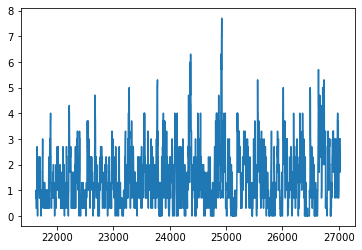

In [495]:
plt.plot(ytest)


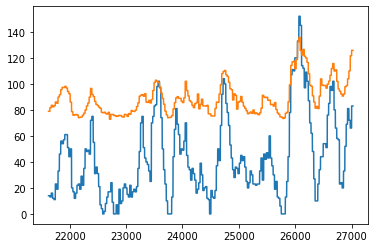

In [496]:
plt.plot(xtest)

In [497]:
import pickle  

In [498]:
with open('NASA SPACE APP','wb') as file: # write binary 
    pickle.dump(train,file) # put model into file

In [499]:
with open('NASA SPACE APP','rb') as file: # read binary 
    ourModel = pickle.load(file) # model is loaded into : ourModel 